In [1]:
import numpy as np
from src import homography as h, main as m, filter as f
from PIL import Image

# Import Image

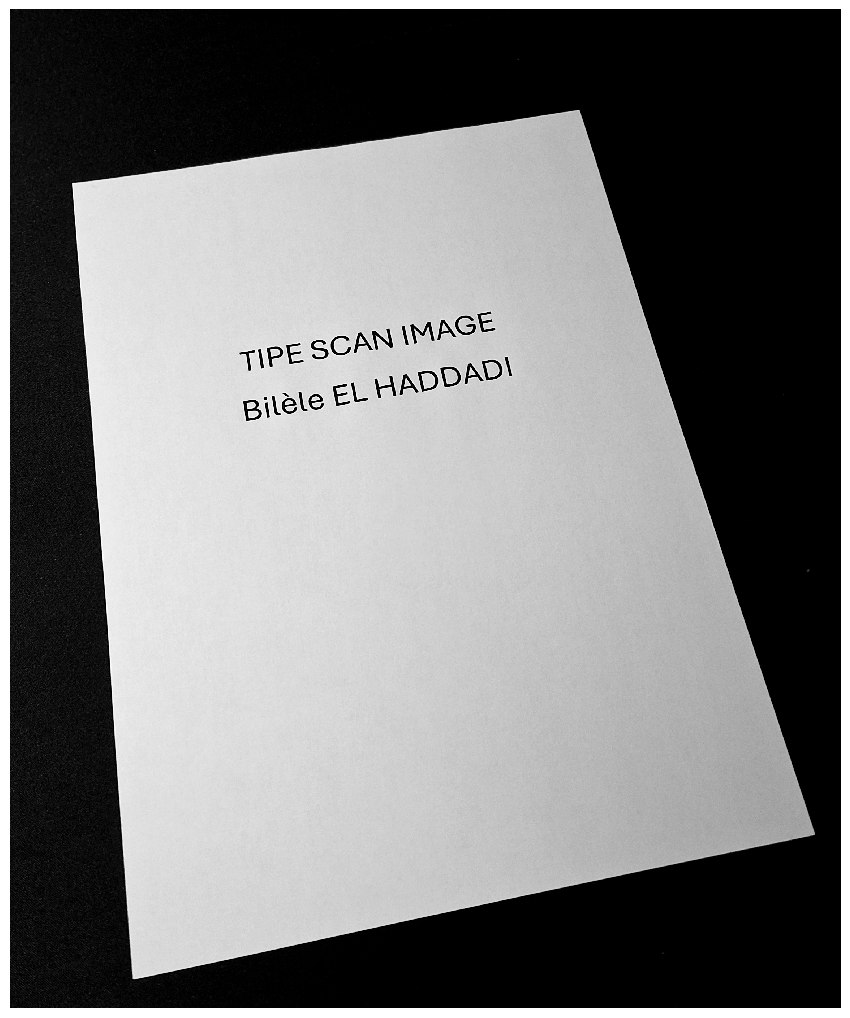

In [2]:
filename = "images/Feuille4.jpg"
name = filename.split('/')[-1].split('.')[0]

I = np.array(Image.open(filename, mode="r").convert('L'))   # Convert jpg to Numpy Matrix
m.print_img(I)

# Projective Transformation

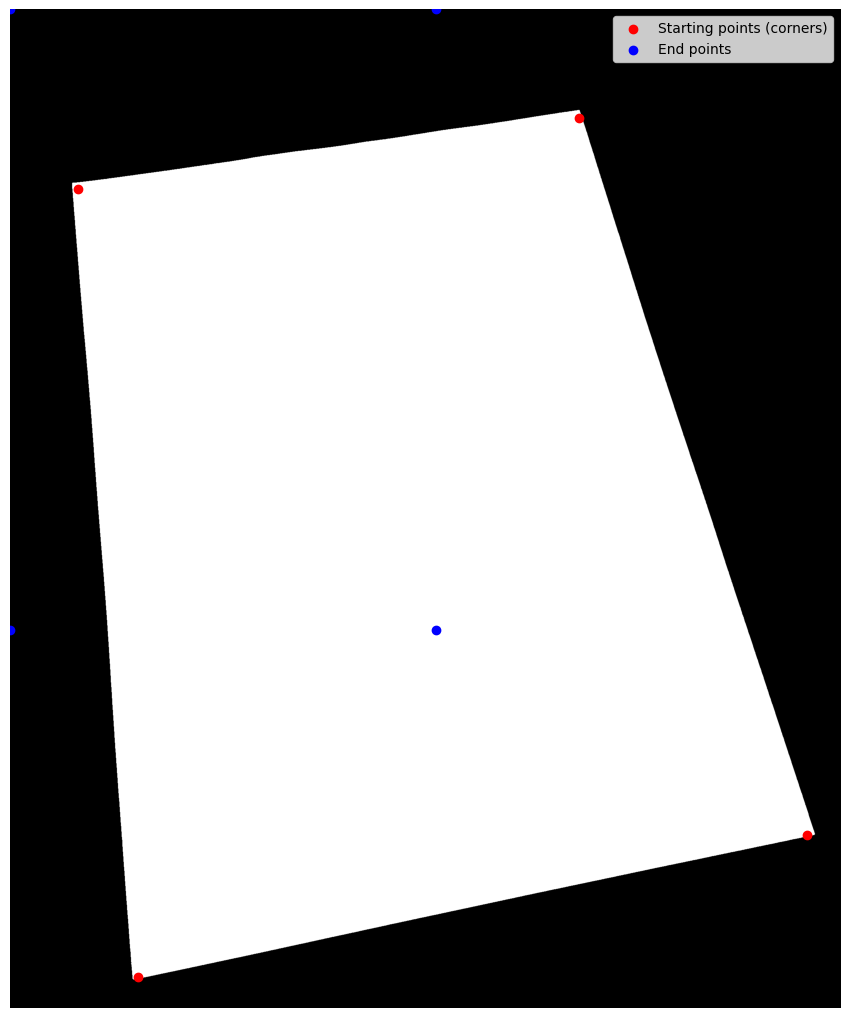

Count of pixels affected by multiple instances (overlap occurrences) : 2087135


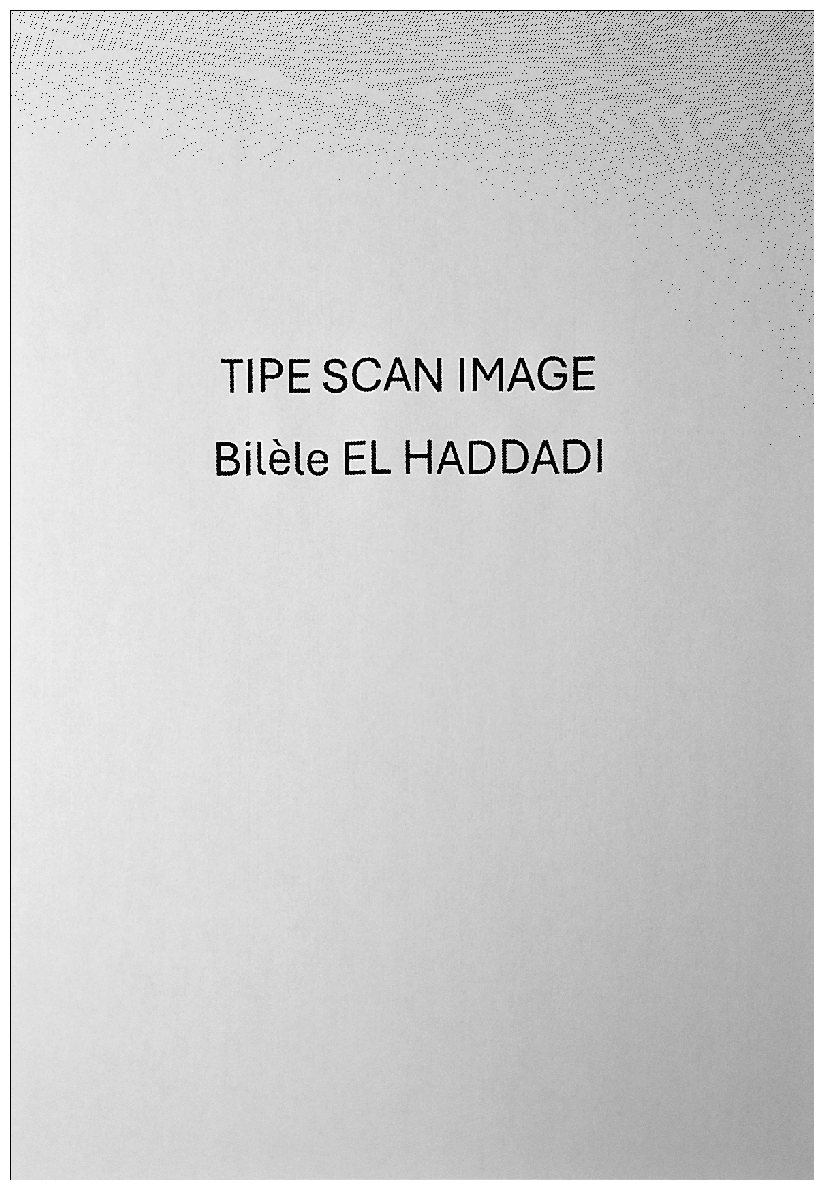

In [3]:
firstTreshold = 100     # Initial threshold used to binarize the image and detect edges. Default is 256/2.
textIslandSize = 2000   # Dark islands with fewer than textIslandSize pixels will be removed. (will remove text inside document)


# Perform an automatic projective transform on a document
H = h.make_projective_transform(I, firstTreshold, textIslandSize)
m.print_img(H)

# Nearest Neighbour Fill Gap

In [4]:
FilledH = h.fill_based_on_neighbors(H)
m.save_img_as_png(FilledH, "./export/Transformed" + name)

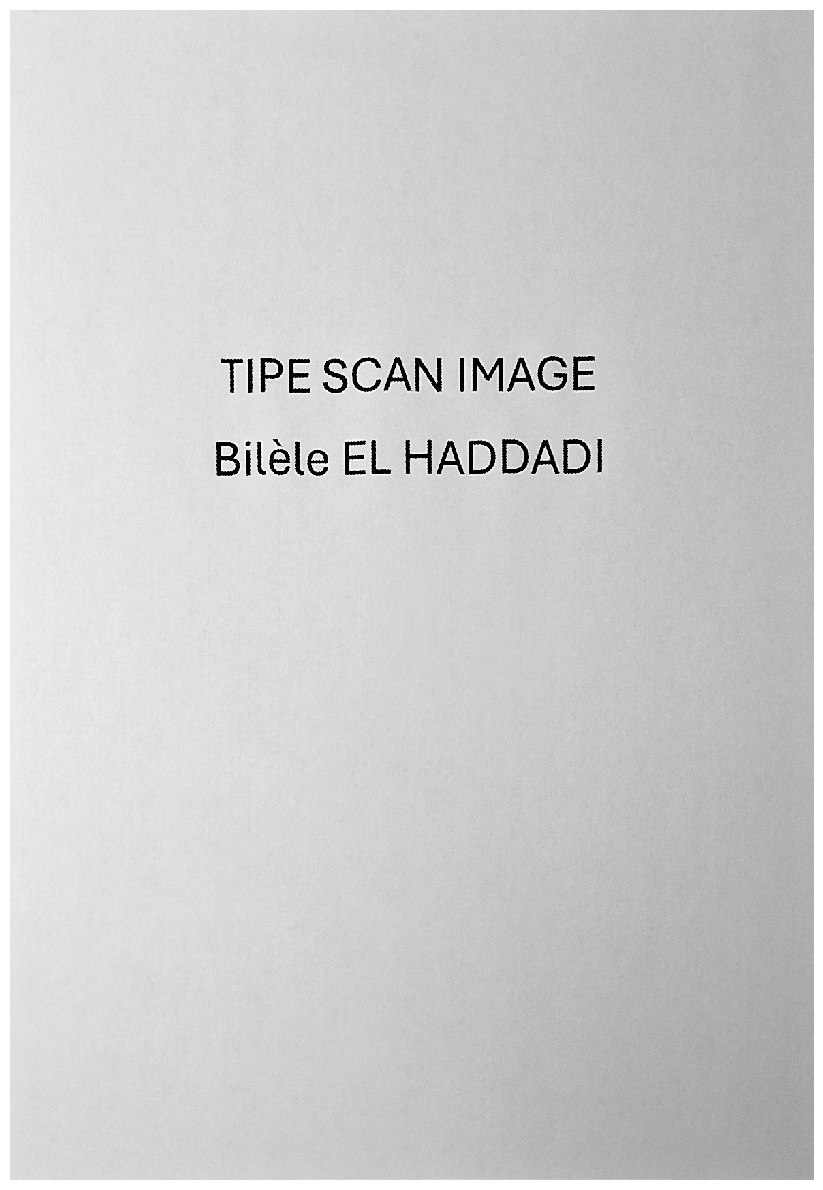

In [5]:
m.print_img(FilledH)

# Local Treshold

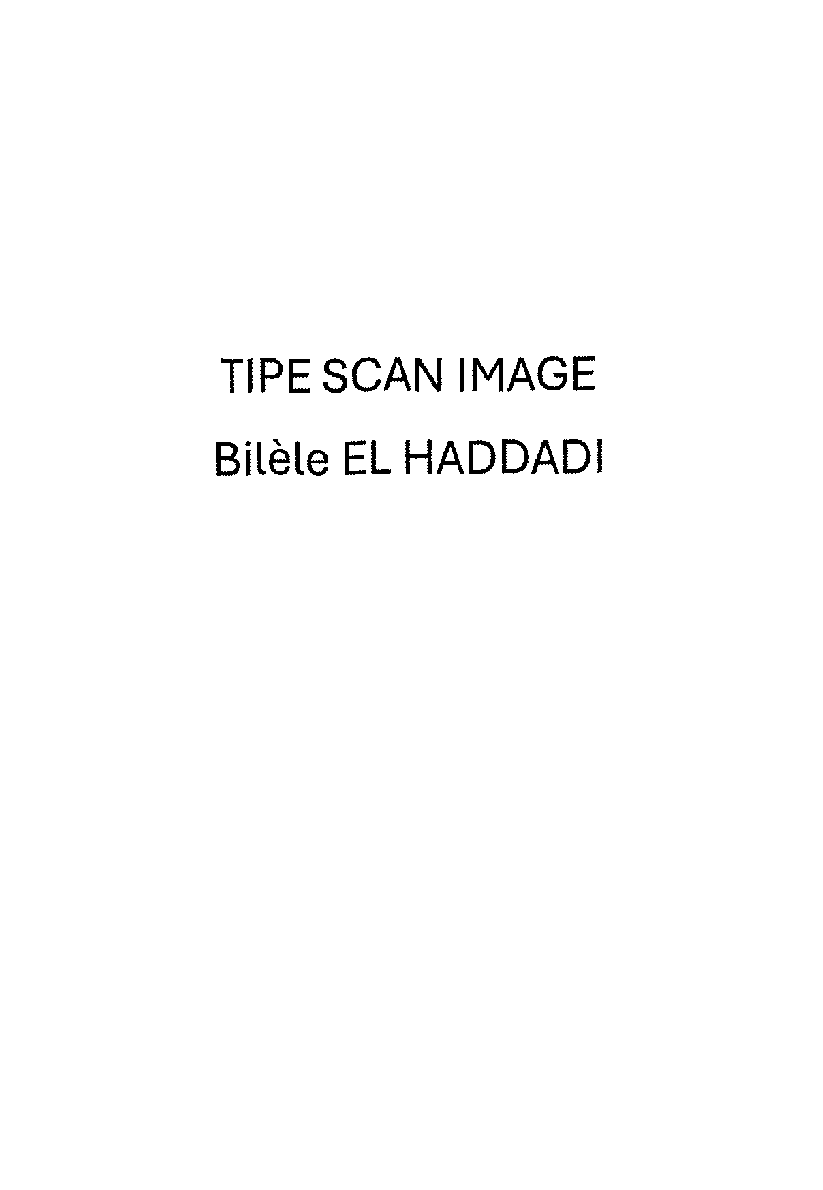

In [6]:
# Values to consider
NeighboorSize = 10
StandardDeviationStrength = .2

S = f.Sauvola(FilledH, NeighboorSize, StandardDeviationStrength)
m.save_img_as_png(S, "export/Tresholded" + name)
m.print_img(S)